# Regressão Linear

Base de dados utilizada:
1. Carregamento de dados
2. Análise dos dados
2. Remoção de campo desnecessário (b)
4. Tratamento de dados nulos e/ou faltantes
5. Separação dos dados, holdout
6. Normalização dos dados
7. Treinamento de modelos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Obtenha os dados
** Leia o arquivo csv 'BostonHousing.csv' em um DataFrame **

**Descrição dos dados**

O quadro de dados Boston tem 506 linhas e 14 colunas.

Este quadro de dados contém as seguintes colunas:

* crim: índice de criminalidade per capita por município.

* zn: proporção de terreno residencial zoneada para lotes acima de 25.000 pés quadrados.

* indus: proporção de hectares de negócios não varejistas por cidade.

* chas: Variável fictícia Charles River (= 1 se o trecho limita o rio; 0 caso contrário).

* nox: concentração de óxidos de nitrogênio (partes por 10 milhões).

* rm: número médio de cômodos por domicílio.

* idade / age: proporção de unidades ocupadas pelo proprietário construídas antes de 1940.

* dis: média ponderada das distâncias para cinco centros de emprego de Boston.

* rad: índice de acessibilidade às rodovias radiais.

* imposto / tax: valor total do imposto predial por \$10.000.

* ptratio: relação aluno-professor por município.

* **preto / b**: 1000(Bk - 0,63)^2 onde Bk é a proporção de negros por cidade.

* lstat: status inferior da população (porcentagem).

* medv: valor médio de residências ocupadas pelos proprietários em \$1000s. (**coluna target do nosso modelo**)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

Verifique o cabeçalho do DataFrame

In [ ]:
df.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Vamos remover a coluna b porque não vamos utilizar essa informação na nossa modelagem.

In [ ]:
df.drop(columns=['b'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [ ]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


## Estatística Descritiva

Dados faltantes

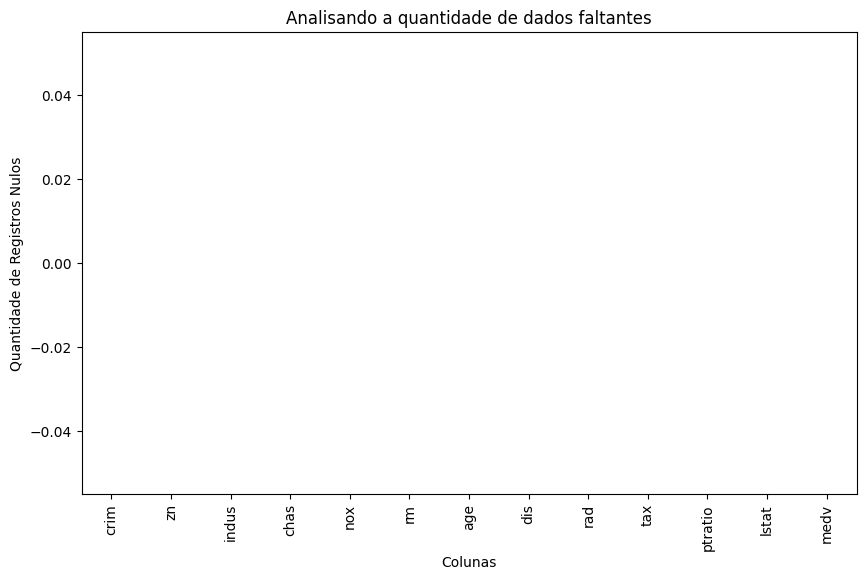

In [ ]:
null_counts = df.isna().sum()

plt.figure(figsize=(10, 6))

null_counts.plot(kind='bar')

plt.title('Analisando a quantidade de dados faltantes')
plt.xlabel('Colunas')
plt.ylabel('Quantidade de Registros Nulos')

plt.show()

Distribuição dos dados

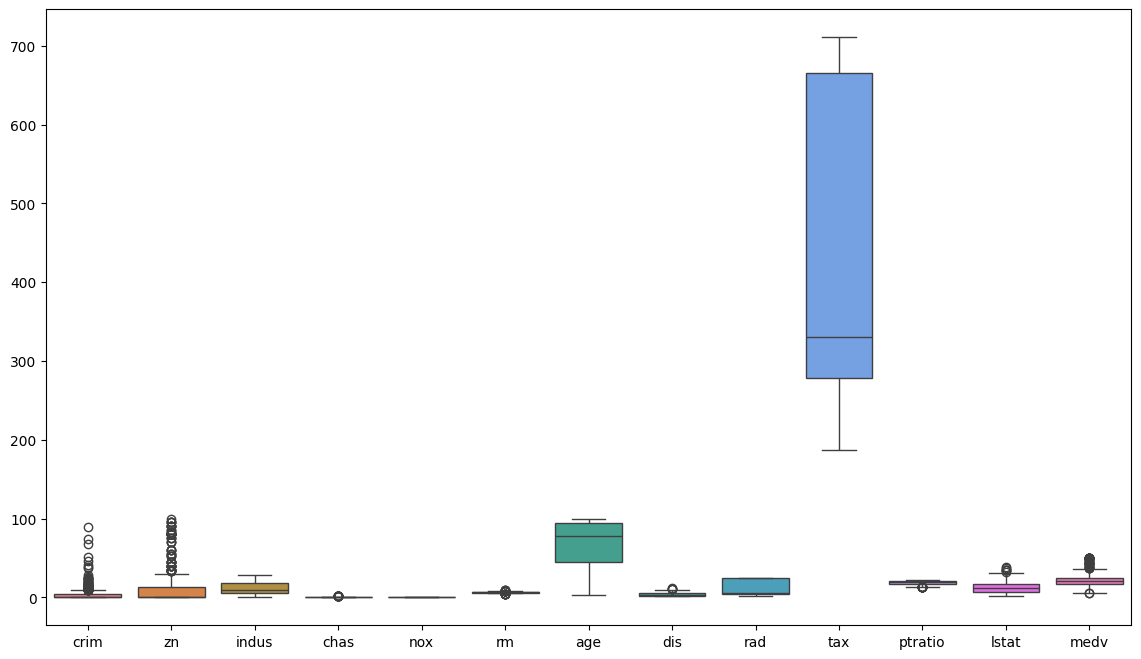

In [ ]:
plt.figure(figsize=(14,8))

sns.boxplot(data=df)

plt.show()

## Separação dos dados, holdout

Use o método train_test_split para dividir seus dados em um conjunto treino e teste.

A coluna target do nosso modelo é **medv**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['medv']),
                                                    df['medv'],
                                                    test_size=0.3,
                                                    random_state=111)

In [ ]:
pd.DataFrame(X_train).head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
199,0.03150,95.0,1.47,0,0.403,6.975,15.3,7.6534,3,402,17.0,4.56
101,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,7.67
386,24.39380,0.0,18.10,0,0.700,4.652,100.0,1.4672,24,666,20.2,28.28
77,0.08707,0.0,12.83,0,0.437,6.140,45.8,4.0905,5,398,18.7,10.27
176,0.07022,0.0,4.05,0,0.510,6.020,47.2,3.5549,5,296,16.6,10.11


## Normalização dos dados

Vamos normalizar os dados.

Import StandardScaler do Scikit-learn.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

Converta as variáveis independentes com o StandardScaler

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)

Use o método .transform () para transformar os parâmetros em uma versão padronizada.

In [ ]:
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled[:3]

array([[-0.44907456,  3.78381385, -1.43347391, -0.28154625, -1.33889353,
         1.02600682, -1.97141772,  1.85891086, -0.76927921, -0.07524679,
        -0.75662273, -1.19006285],
       [-0.43799762, -0.46194571, -0.40276632, -0.28154625, -0.31222266,
         0.73462462,  0.06573687, -0.42852307, -0.54062695, -0.18141874,
         1.10972235, -0.74008473],
       [ 2.80931263, -0.46194571,  0.98410962, -0.28154625,  1.26727098,
        -2.46306977,  1.10977861, -1.09077412,  1.63156951,  1.48194185,
         0.77473734,  2.24192461]])

Visualizando os dados de treinamento.

In [ ]:
display(pd.DataFrame(X_train_scaled).head())

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.449075,3.783814,-1.433474,-0.281546,-1.338894,1.026007,-1.971418,1.858911,-0.769279,-0.075247,-0.756623,-1.190063
1,-0.437998,-0.461946,-0.402766,-0.281546,-0.312223,0.734625,0.065737,-0.428523,-0.540627,-0.181419,1.109722,-0.740085
2,2.809313,-0.461946,0.984110,-0.281546,1.267271,-2.463070,1.109779,-1.090774,1.631570,1.481942,0.774737,2.241925
3,-0.441642,-0.461946,0.217984,-0.281546,-1.040545,-0.228138,-0.861896,0.160060,-0.540627,-0.098841,0.056912,-0.363897
4,-0.443896,-0.461946,-1.058407,-0.281546,-0.399972,-0.408375,-0.810967,-0.095323,-0.540627,-0.700482,-0.948043,-0.387047


Visualizando os dados de teste.

In [ ]:
display(pd.DataFrame(X_test_scaled).head())

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.449442,0.789436,0.539263,-0.281546,-0.803621,-0.121498,-1.476680,-0.042397,-0.654953,-0.853841,-0.182363,-0.951328
1,-0.371073,-0.461946,-0.745851,-0.281546,-0.426297,0.489803,0.411326,-0.230167,-0.197649,-0.635599,-0.565203,-0.750213
2,-0.449592,2.889970,-1.218319,-0.281546,-1.119519,0.455258,-1.734962,0.784976,-0.769279,-0.960013,-0.134508,-1.224788
3,-0.440850,-0.461946,2.081690,-0.281546,0.223050,-0.496991,0.851497,-0.795291,-0.883605,-1.337513,0.248332,0.744409
4,-0.448593,3.783814,-1.257570,-0.281546,-1.223941,2.344737,-1.320256,0.649989,-0.654953,-1.125169,-1.857288,-1.298578


## Regressão Linear

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression()
reg.fit(X_train_scaled, y_train)

LinearRegression()

**Executar o modelo treinado na base de treinamento**

In [ ]:
y_train_pred = reg.predict(X_train_scaled)
y_test_pred = reg.predict(X_test_scaled)

Analisando o score de treino e teste.

In [ ]:
print("R² score de treino:", r2_score(y_train, y_train_pred))

R² score de treino: 0.7381975510401046


In [ ]:
print("R² score de teste:", r2_score(y_test, y_test_pred))

R² score de teste: 0.711547915567693


**Avaliação de Regressores - Exibir os Resultados**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

In [ ]:
def print_metrics(y_test_in, y_test_pred_in):
  print("MEAN: ", mean_absolute_error(y_test_in, y_test_pred_in))
  print("MAPE: ", mean_absolute_percentage_error(y_test_in, y_test_pred_in))
  print("MSE: ", mean_squared_error(y_test_in, y_test_pred_in))
  print("RMSE: ", mean_squared_error(y_test_in, y_test_pred_in)**2)
  print("R²: ", r2_score(y_test_in, y_test_pred_in))

In [ ]:
# dados de treino
print_metrics(y_train, y_train_pred)

MEAN:  3.1835585717761252
MAPE:  0.16078737073033178
MSE:  20.374619886830068
RMSE:  415.12513553281127
R²:  0.7381975510401046


In [ ]:
# dados de teste
print_metrics(y_test, y_test_pred)

MEAN:  3.701488287606292
MAPE:  0.17831885665559696
MSE:  28.607656840343854
RMSE:  818.3980298948725
R²:  0.711547915567693


## k-NN Regressão

**Executar o modelo treinado na base de treinamento**

In [ ]:
# score dos dados de treino

In [ ]:
# score dos dados de teste.
knn.score(X_test_scaled, y_test)

**Avaliar o melhor valor de K**

In [ ]:
import numpy as np

score = []

for i in range(1,30):
  ## treine o modelo
  ## calcule as métricas
  ## armazene na lista score
  print("k=", i)

plt.figure(figsize=(10,6))
plt.plot(range(1,30), score, color='blue', linestyle='dashed', marker='o',
           markerfacecolor = 'red', markersize=10)
plt.title('Score vs valor de K')
plt.xlabel('K')
plt.ylabel('Score')
plt.show()

### Criar um regressor com o melhor valor para o melhor K e avaliar





In [ ]:
## com o melhor valor de k
print(knn.score(X_train_scaled, y_train))
print(knn.score(X_test_scaled, y_test))

**Avaliação de Regressores - k-NN**

In [ ]:
print("Dados de treino")

In [ ]:
print("Dados de teste")

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Gráficio Preditos vs Reais - k-NN')
plt.scatter(y_test, y_test_knn_pred)
plt.show()

## Treinar o modelo de Regressão Polinomial, n=1, n=5, n=10

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

### Com os dados normalizados, aplicar a transformação polinomial de graus 1, 5, 10 e 15

Grau 1

In [ ]:
poly_grau_1 = PolynomialFeatures(degree=1)
X_train_scaled_poly_1 = poly_grau_1.fit_transform(X_train_scaled)
X_test_scaled_poly_1 = poly_grau_1.transform(X_test_scaled)

Grau 5

Grau 10

**Treinar o modelo de regressão linear para verificar o melhor resultado da transformação polinomial**

Grau 1

In [ ]:
## treine o modelo

In [ ]:
## analise as métricas

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Gráficio Preditos vs Reais - Polinomio 1')
sns.regplot(x=y_test,y=y_pred_poly_1,line_kws={"color": "red"})
plt.show()

Grau 5

In [ ]:
## treine o modelo

In [ ]:
## análise as métricas

Grau 10

In [ ]:
## treine o modelo - vai demorar um pouco..

In [ ]:
## analise as métricas

## Conclusão